<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/main/2348549_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df=pd.read_csv('/content/spam1.csv')
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5567     False    False
5568     False    False
5569     False    False
5570     False    False
5571     False    False

[5572 rows x 2 columns]>

In [ ]:
df.isna().sum()

Category    0
Message     0
dtype: int64

total count of spam and not spam

In [ ]:
#count of spam and not spam
spam_count = len(df[df['Category'] == 'spam'])
not_spam_count = len(df[df['Category'] == 'ham'])

print(f"Spam Count: {spam_count}")
print(f"Not Spam Count: {not_spam_count}")

Spam Count: 747
Not Spam Count: 4825


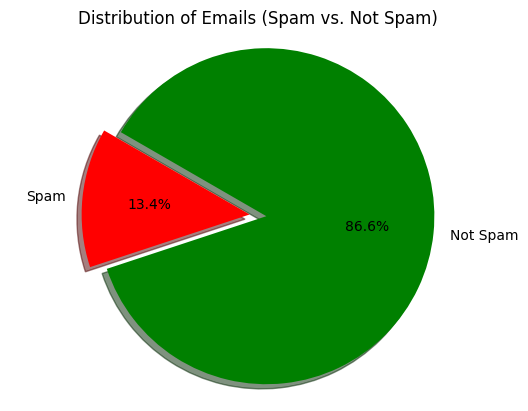

In [ ]:
# Data to plot
labels = 'Spam', 'Not Spam'
sizes = [spam_count, not_spam_count]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the first slice (Spam)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Emails (Spam vs. Not Spam)')

# Show the pie chart
plt.show()

here we use multinomial distribution is used since the data is sumarized in discrete form of data before that we split the data by training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy: 0.9919282511210762

Confusion Matrix:
[[966   0]
 [  9 140]]


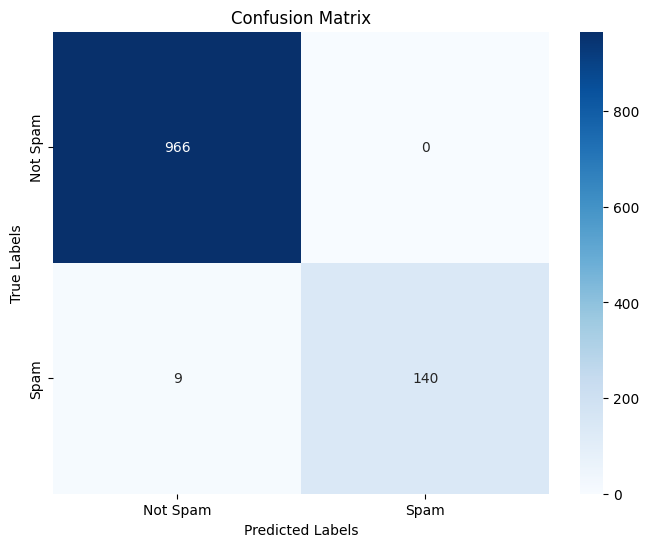

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Build a Naive Bayes classifier with Laplace smoothing (alpha=1)
naive_bayes = MultinomialNB(alpha=1)
naive_bayes.fit(X_train_vec, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(confusion)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sn.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


here in the above confusion matrix we see that 966 of the are not spam which is not an issue also we also see in.

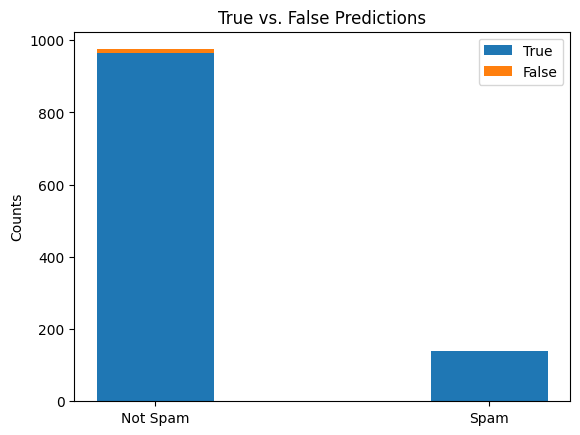

In [ ]:
#stacked bar
true_negative, false_positive, false_negative, true_positive = confusion.ravel()

# Create a grouped bar chart
labels = ['Not Spam', 'Spam']
true_values = [true_negative, true_positive]
false_values = [false_negative, false_positive]

width = 0.35
fig, ax = plt.subplots()

bar1 = ax.bar(labels, true_values, width, label='True')
bar2 = ax.bar(labels, false_values, width, label='False', bottom=true_values)

ax.set_ylabel('Counts')
ax.set_title('True vs. False Predictions')
ax.legend()

plt.show()

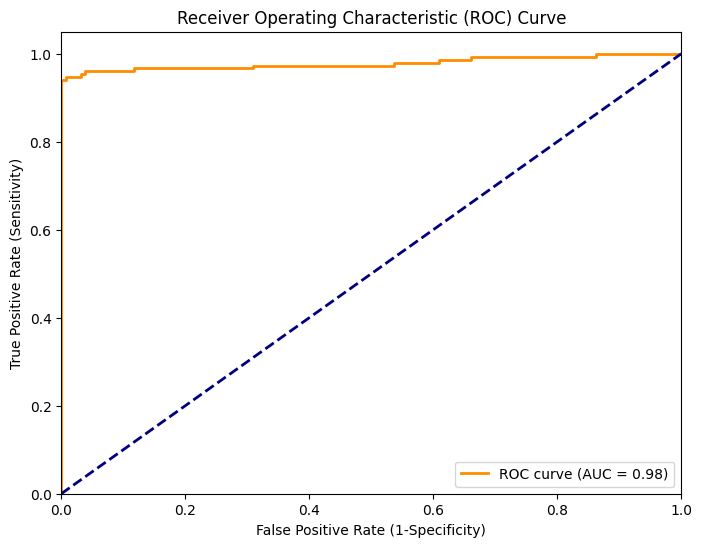

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = naive_bayes.predict_proba(X_test_vec)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

#Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




high AUC suggests that the model has a very high power, and it is effective at correctly classifying spam messages while minimizing false positives.



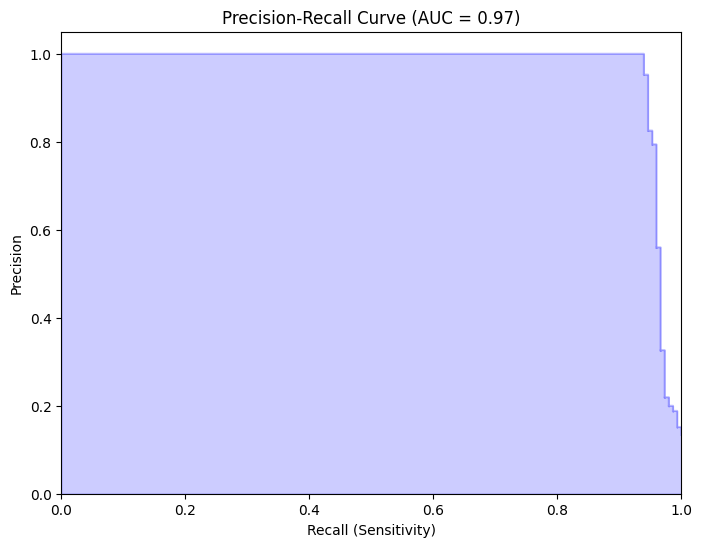

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve (AUC = {average_precision:.2f})')
plt.show()

in the above curve we see that area is 0.97 of accuracy that impacts the model to reduce false positives and give accurate spam prediction which we dont see much


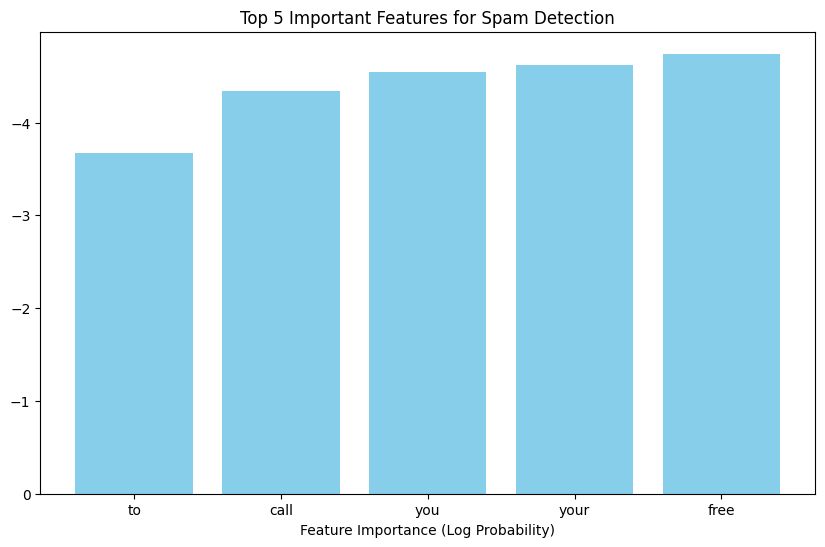

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Get the feature names (words or phrases)
feature_names = vectorizer.get_feature_names_out()

# Get the feature importances (log probabilities)
feature_importances = naive_bayes.feature_log_prob_[1]  # 1 corresponds to the spam class

# Sort feature importances in descending order and get the top N
top_n =5
top_indices = feature_importances.argsort()[::-1][:top_n]
top_features = [feature_names[i] for i in top_indices]
top_importances = [feature_importances[i] for i in top_indices]

# Create a bar chart to visualize the top N important features
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance (Log Probability)')
plt.title(f'Top {top_n} Important Features for Spam Detection')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


The above bar graph illustrates the top N words  that the Naive Bayes model with Laplace smoothing relies on the most to distinguish between spam and non-spam emails, based on their log probabilities.

Model Evaluation Metrics:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have your test data and predictions
y_pred = naive_bayes.predict(X_test_vec)  # Replace 'X_test_vec' with your test data
y_prob = naive_bayes.predict_proba(X_test_vec)[:, 1]  # Replace 'X_test_vec' with your test data

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1:",f1)
roc_auc


accuracy: 0.9919282511210762
precision: 1.0
recall: 0.9395973154362416
f1: 0.9688581314878892


0.9787124654355469

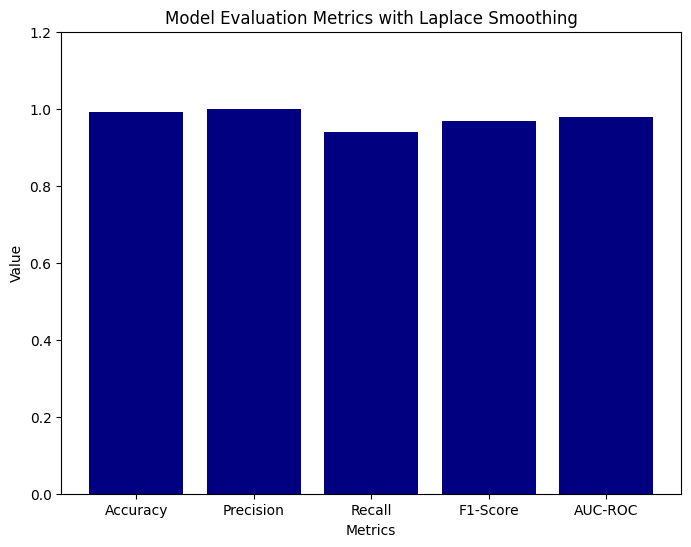

In [ ]:

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Value': [accuracy, precision, recall, f1, roc_auc]
})

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Metric'], metrics_df['Value'], color='navy')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics with Laplace Smoothing')
plt.ylim(0, 1.2)
plt.show()


on seeing the above graph we see that the performance of the model provided is the best based on the accuracy being 99%

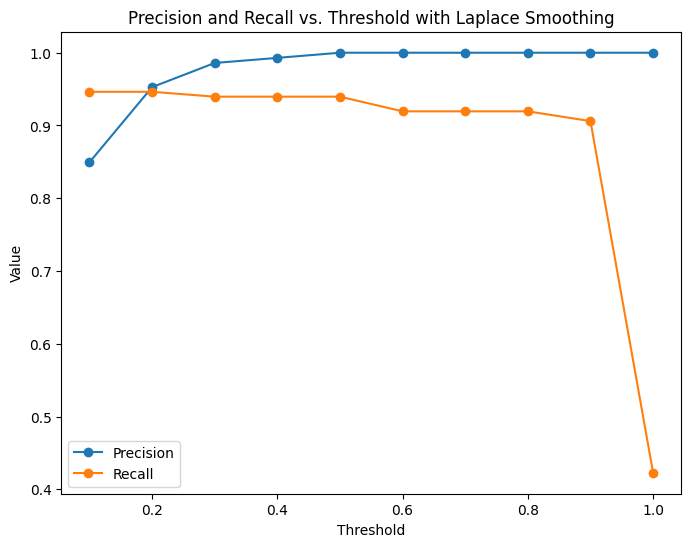

In [ ]:
thresholds = np.arange(0.1, 1.1, 0.1)

# Initialize empty lists to store precision and recall values for different thresholds
precision_values = []
recall_values = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    precision_values.append(precision_score(y_test, y_pred_thresholded))
    recall_values.append(recall_score(y_test, y_pred_thresholded))

# Create a line graph to visualize the precision-recall trade-off
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_values, label='Precision', marker='o')
plt.plot(thresholds, recall_values, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Threshold with Laplace Smoothing')
plt.legend()
plt.show()
